# <font color='purple'>FUNOVA Preprocessing QC statistics </font> 
### January 2025

In [3]:
import os
NOVA_HOME = "/home/projects/hornsteinlab/Collaboration/NOVA_GAL/NOVA"
NOVA_DATA_HOME = '/home/projects/hornsteinlab/Collaboration/FUNOVA'

LOGS_PATH = os.path.join(NOVA_DATA_HOME, "outputs/preprocessing/logs/")
PLOT_PATH = os.path.join(NOVA_DATA_HOME, "outputs/logs/")

os.chdir(NOVA_HOME)

import pandas as pd
import contextlib
import io
from IPython.display import display, Javascript
import seaborn as sns
from tools.preprocessing_tools.qc_reports.qc_utils import log_files_qc, run_validate_folder_structure, display_diff, sample_and_calc_variance, \
                                                show_site_survival_dapi_brenner, show_site_survival_dapi_cellpose, \
                                                show_site_survival_dapi_tiling, show_site_survival_target_brenner, \
                                                calc_total_sums, plot_filtering_heatmap, show_total_sum_tables, \
                                                plot_cell_count, plot_catplot, plot_hm_combine_batches, plot_hm, \
                                                run_calc_hist_new, plot_marker_data, find_bad_wells, create_marker_info_df, \
                                                show_site_survival_by_brenner_on_dapi_tiles, show_site_survival_target_brenner_tiles
                                                
from tools.preprocessing_tools.qc_reports.qc_config import (
    funova_markers as markers,
    funova_cell_lines as cell_lines,
    funova_cell_lines_to_cond as cell_lines_to_cond,
    funova_cell_lines_for_disp as cell_lines_for_disp,
    funova_reps as reps,
    funova_line_colors as line_colors,
    funova_lines_order as lines_order,
    funova_custom_palette as custom_palette,
    funova_expected_dapi_raw as expected_dapi_raw,
    funova_panels as panels,
    funova_marker_info as marker_info
)

from tools.show_images_utils import *
%load_ext autoreload
%autoreload 2

In [4]:
# choose batches
batches = ['Batch1', 'Batch2']#, 'batch2', 'batch3']
batches

['Batch1', 'Batch2']

# I have created a folder called 'Batch1' in the logs dir and put all files inside

In [5]:
validate_antibody = False

In [6]:
df = log_files_qc(LOGS_PATH, batches, only_wt_cond = False)

reading logs of Batch1
csv /home/projects/hornsteinlab/Collaboration/FUNOVA/outputs/preprocessing/logs/Batch1/cell_count_stats060325_173404_786423.csv

Total of 1 files were read.
Before dup handeling  (171516, 22)
After duplication removal #1: (171516, 23)
After duplication removal #2: (171516, 23)


In [7]:
df[['cell_line', 'marker', 'cell_line_cond']] = df[['cell_line', 'marker', 'cell_line_cond']].apply(lambda x: x.str.replace('_', '-', regex=False))

In [8]:
df['filename'] = df['filename'].str.split('-').str[0]
df['site_num'] = df['site_num'].str.split('-').str[0]

In [9]:
df_dapi = df[df.marker=='DAPI']
df_target = df[df.marker!='DAPI']

## Actual Files Validation

### Raw Files Validation

1. How many site **tiff** files do we have in each folder?
2. Are all existing files valid? (tif, at least 2049kB, not corrupetd)

In [11]:
root_directory_raw = os.path.join(NOVA_DATA_HOME, 'input', 'images', 'raw')

In [12]:
df_metadata = extract_image_metadata(root_directory_raw, FILE_EXTENSION = '.tiff', KEY_BATCH = 'Batch')

In [13]:
# root_path = "/home/labs/hornsteinlab/Collaboration/FUNOVA/input/images/raw/"
# marker_info_df = create_marker_info_df(root_path)

Batch1
Folder structure is valid.
No bad files are found.
Total Sites:  118400


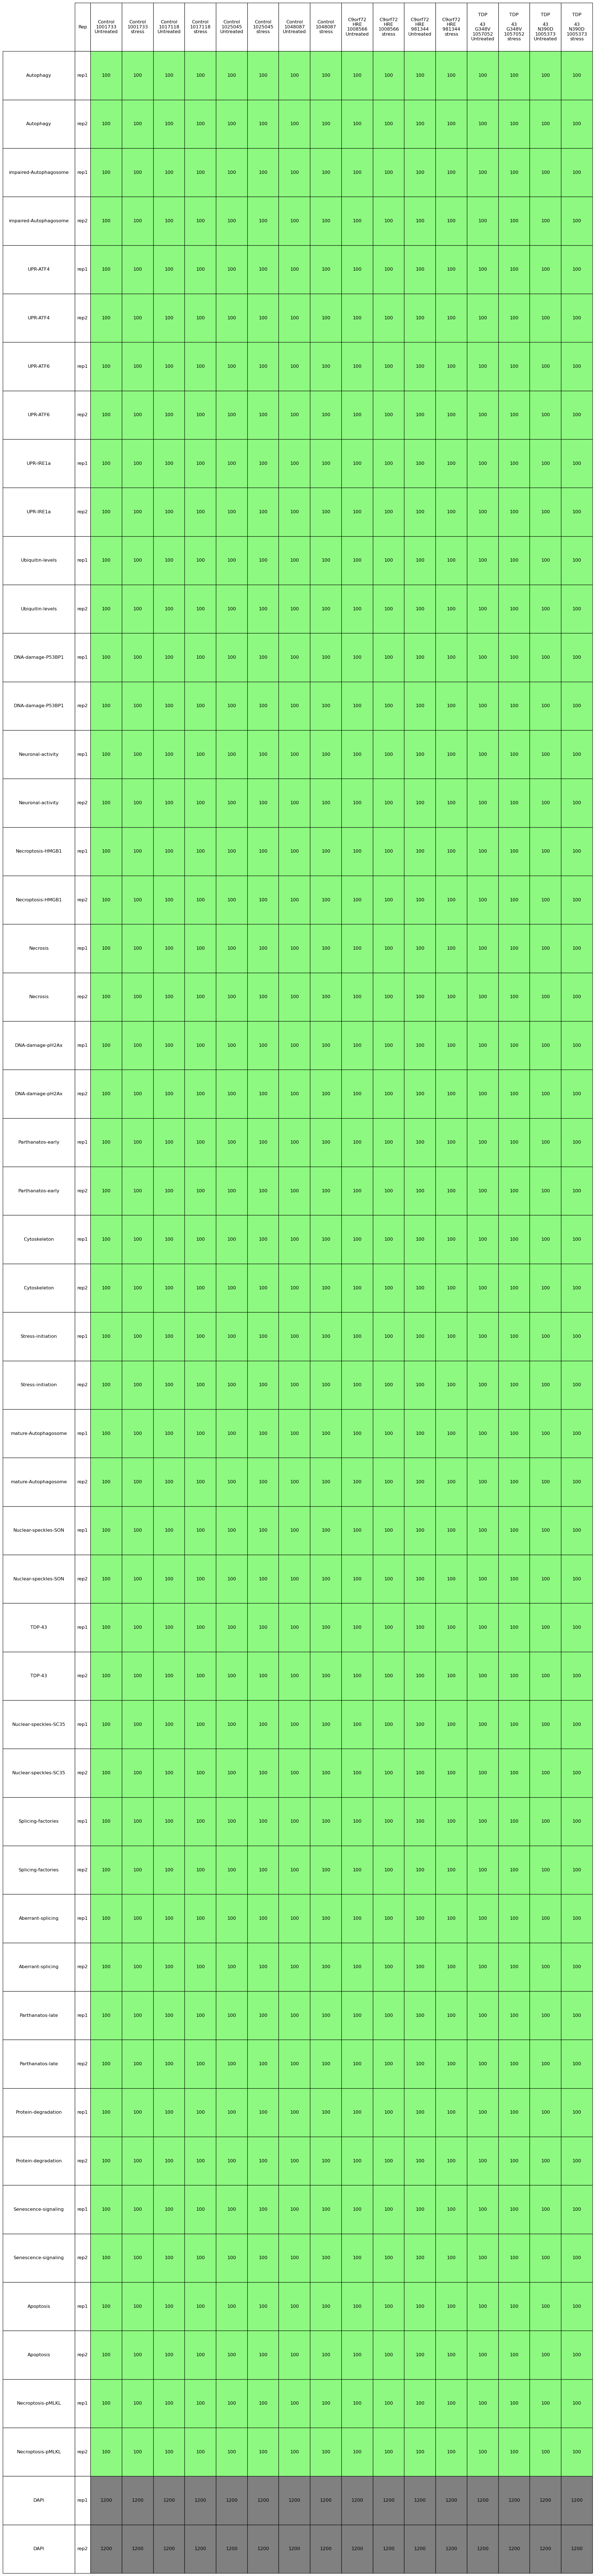

Batch2
Folder structure is valid.
No bad files are found.
Total Sites:  118400


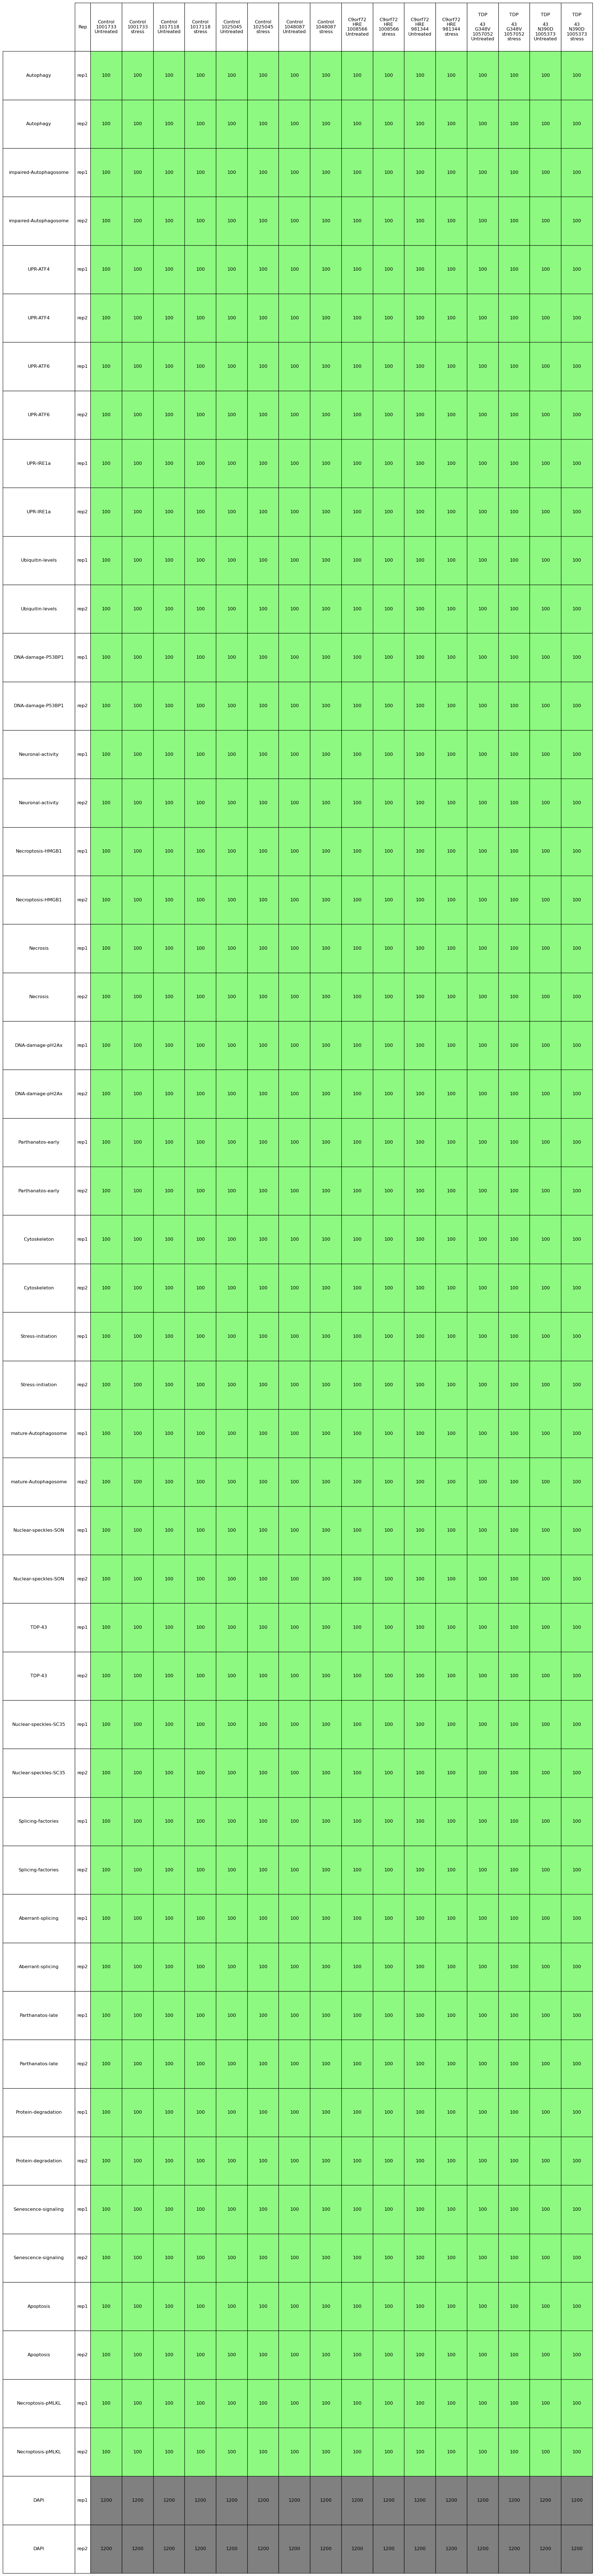

In [14]:
batches_raw = [batch.replace("_16bit_no_downsample","") for batch in batches]
raws = run_validate_folder_structure(root_directory_raw, False, panels, markers.copy(), PLOT_PATH, marker_info,
                                    cell_lines_to_cond, reps, cell_lines_for_disp, expected_dapi_raw,
                                     batches=batches_raw, fig_width=8,fig_height = 40,
                                    expected_count=100, validate_antibody = validate_antibody)

### Processed Files Validation

1. How many site **npy** files do we have in each folder? -> How many sites survived the pre-processing?
2. Are all existing files valid? (at least 100kB, npy not corrupted)

Batch1
Folder structure is valid.
495 files are bad:
/home/projects/hornsteinlab/Collaboration/FUNOVA/input/images/processed/Batch1/Control-1001733/Untreated/impaired-Autophagosome, rep1_r05c07f34-ch3t1_panelD_Control-1001733_processed.npy small size (0.128 kB)
/home/projects/hornsteinlab/Collaboration/FUNOVA/input/images/processed/Batch1/Control-1001733/Untreated/UPR-ATF4, rep2_r05c06f91-ch3t1_panelC_Control-1001733_processed.npy small size (0.128 kB)
/home/projects/hornsteinlab/Collaboration/FUNOVA/input/images/processed/Batch1/Control-1001733/Untreated/UPR-ATF4, rep2_r05c06f82-ch3t1_panelC_Control-1001733_processed.npy small size (0.128 kB)
/home/projects/hornsteinlab/Collaboration/FUNOVA/input/images/processed/Batch1/Control-1001733/Untreated/UPR-ATF4, rep1_r05c05f99-ch3t1_panelC_Control-1001733_processed.npy small size (0.128 kB)
/home/projects/hornsteinlab/Collaboration/FUNOVA/input/images/processed/Batch1/Control-1001733/Untreated/UPR-ATF4, rep1_r05c05f88-ch3t1_panelC_Control-10

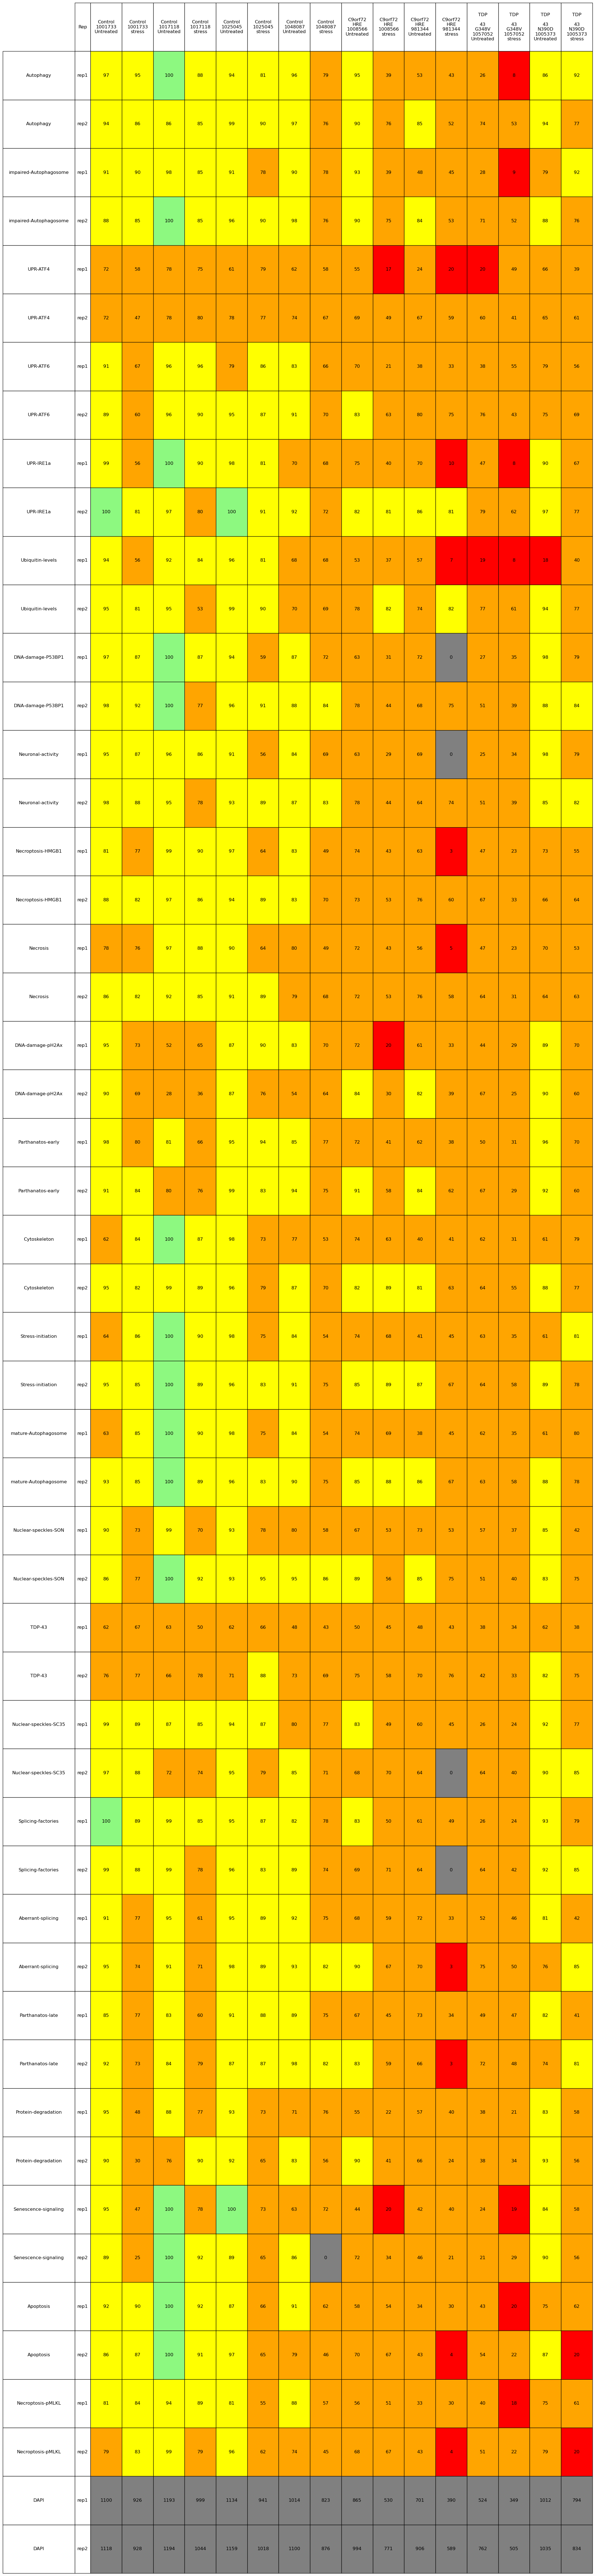

Batch2
Folder structure is valid.
413 files are bad:
/home/projects/hornsteinlab/Collaboration/FUNOVA/input/images/processed/Batch2/Control-1001733/Untreated/UPR-ATF4, rep1_r05c05f07-ch3t1_panelC_Control-1001733_processed.npy small size (0.128 kB)
/home/projects/hornsteinlab/Collaboration/FUNOVA/input/images/processed/Batch2/Control-1001733/Untreated/UPR-ATF4, rep2_r05c06f44-ch3t1_panelC_Control-1001733_processed.npy small size (0.128 kB)
/home/projects/hornsteinlab/Collaboration/FUNOVA/input/images/processed/Batch2/Control-1001733/Untreated/UPR-ATF4, rep2_r05c06f67-ch3t1_panelC_Control-1001733_processed.npy small size (0.128 kB)
/home/projects/hornsteinlab/Collaboration/FUNOVA/input/images/processed/Batch2/Control-1001733/Untreated/UPR-ATF4, rep1_r05c05f09-ch3t1_panelC_Control-1001733_processed.npy small size (0.128 kB)
/home/projects/hornsteinlab/Collaboration/FUNOVA/input/images/processed/Batch2/Control-1001733/Untreated/UPR-ATF4, rep1_r05c05f02-ch3t1_panelC_Control-1001733_processe

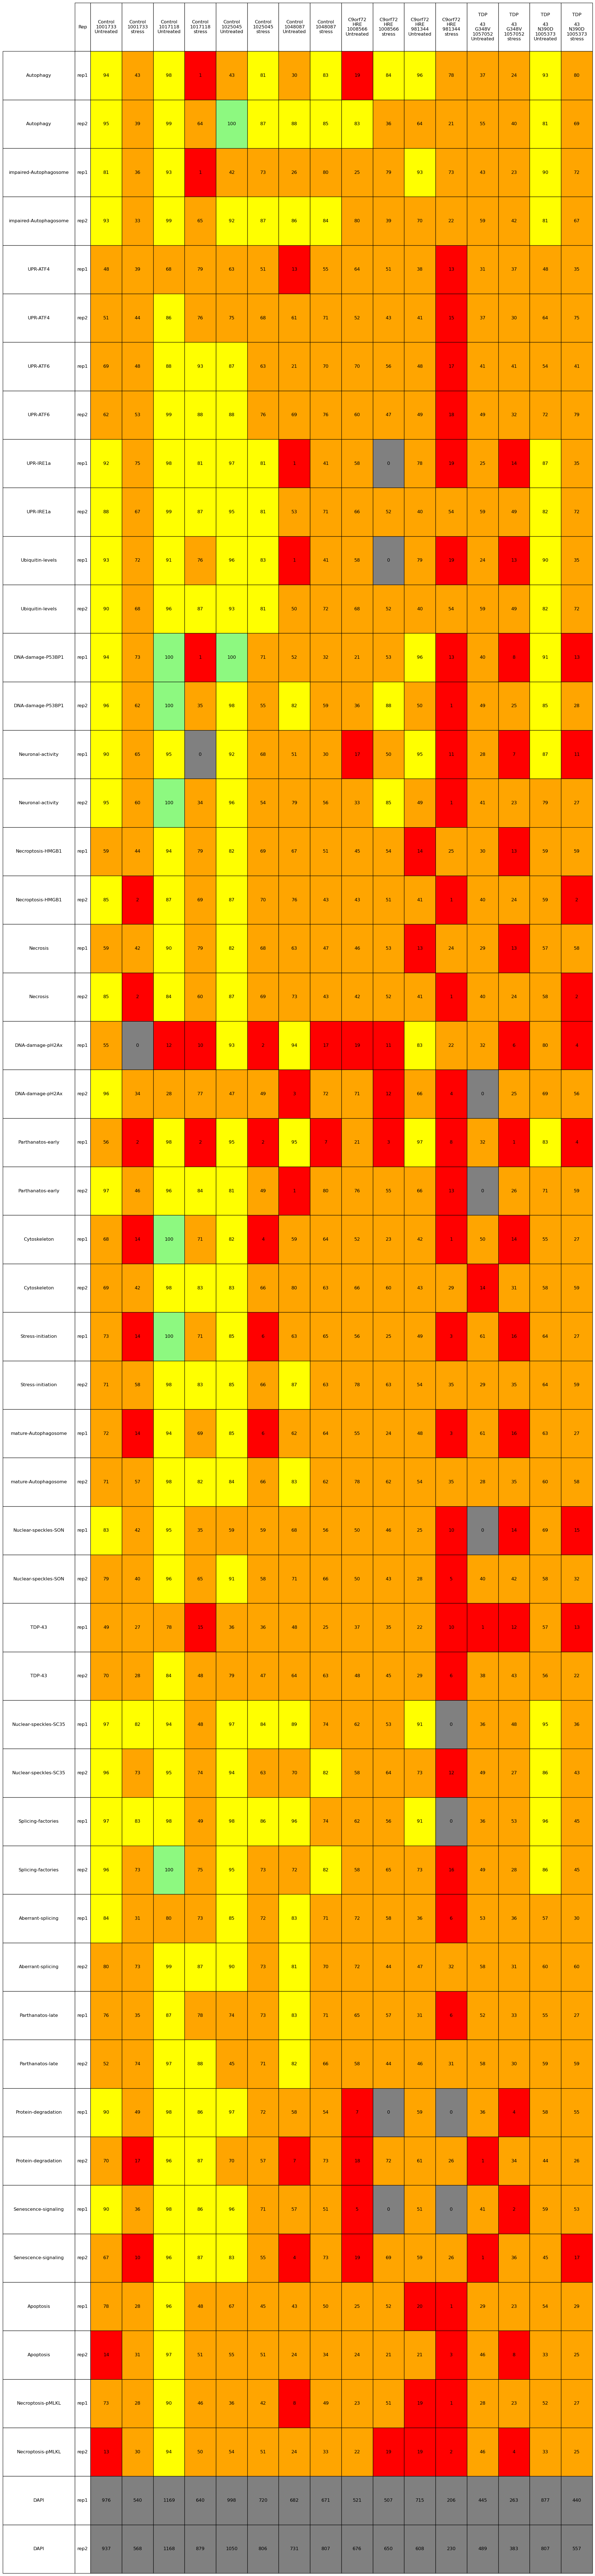

In [15]:
root_directory_proc = os.path.join(NOVA_DATA_HOME, 'input', 'images', 'processed')
procs = run_validate_folder_structure(root_directory_proc, True, panels, markers, PLOT_PATH, marker_info,
                                    cell_lines_to_cond, reps, cell_lines_for_disp, expected_dapi_raw,
                                     batches=batches, fig_width=8,fig_height = 40,
                                    expected_count=100, validate_antibody = validate_antibody)

### Difference between Raw and Processed

Batch1


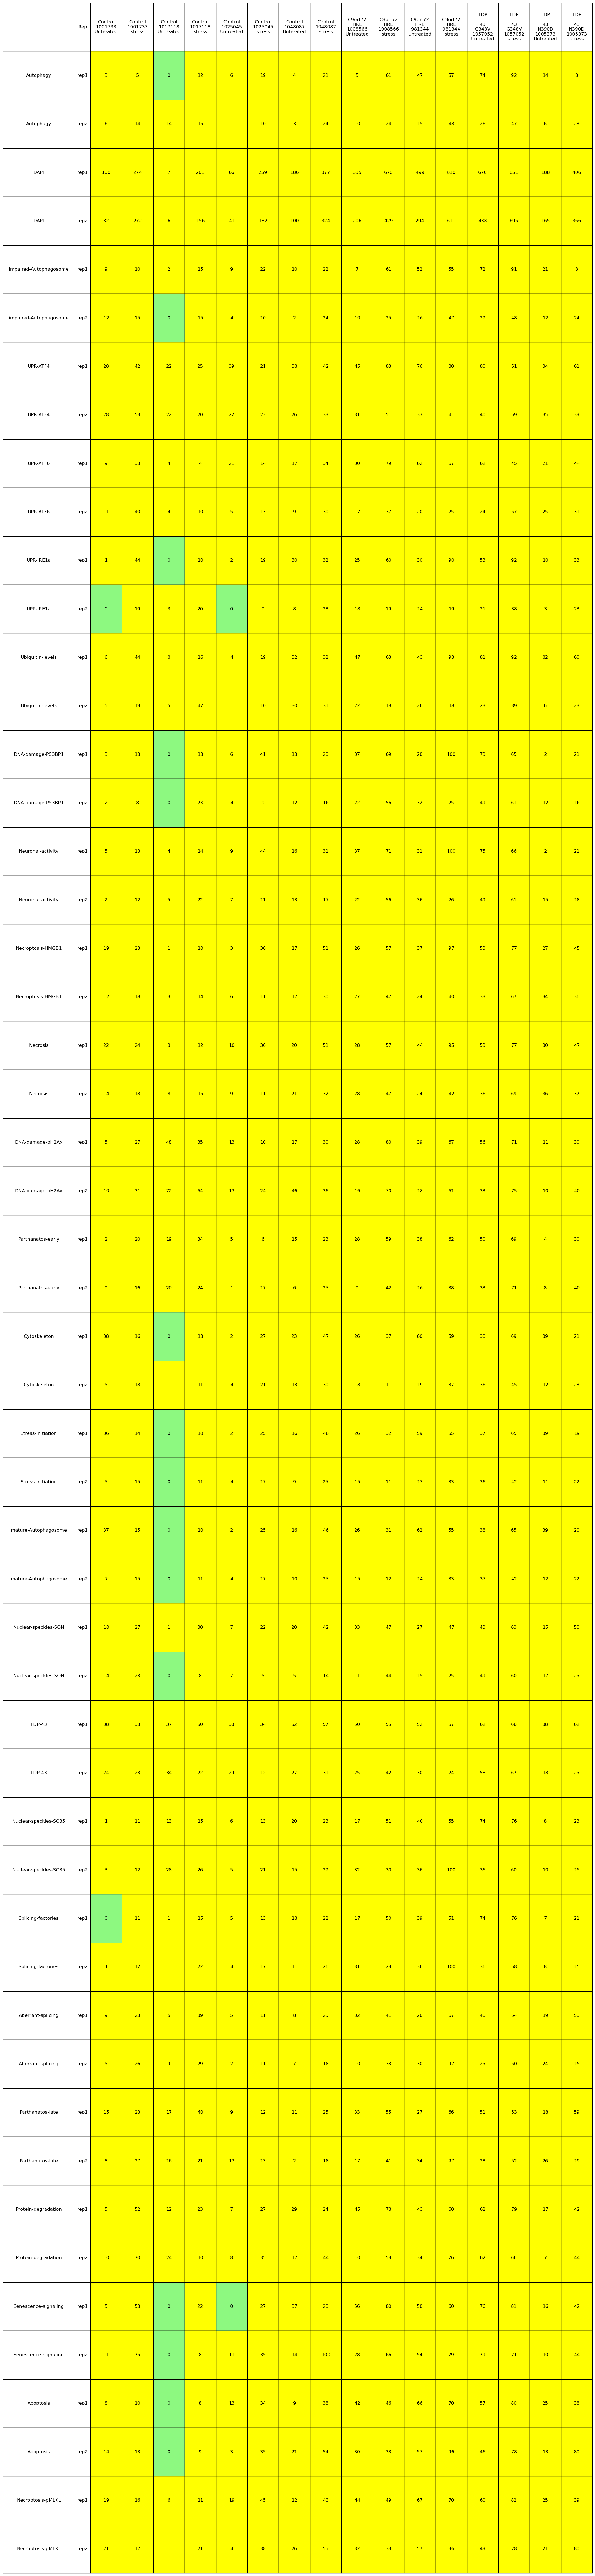

Batch2


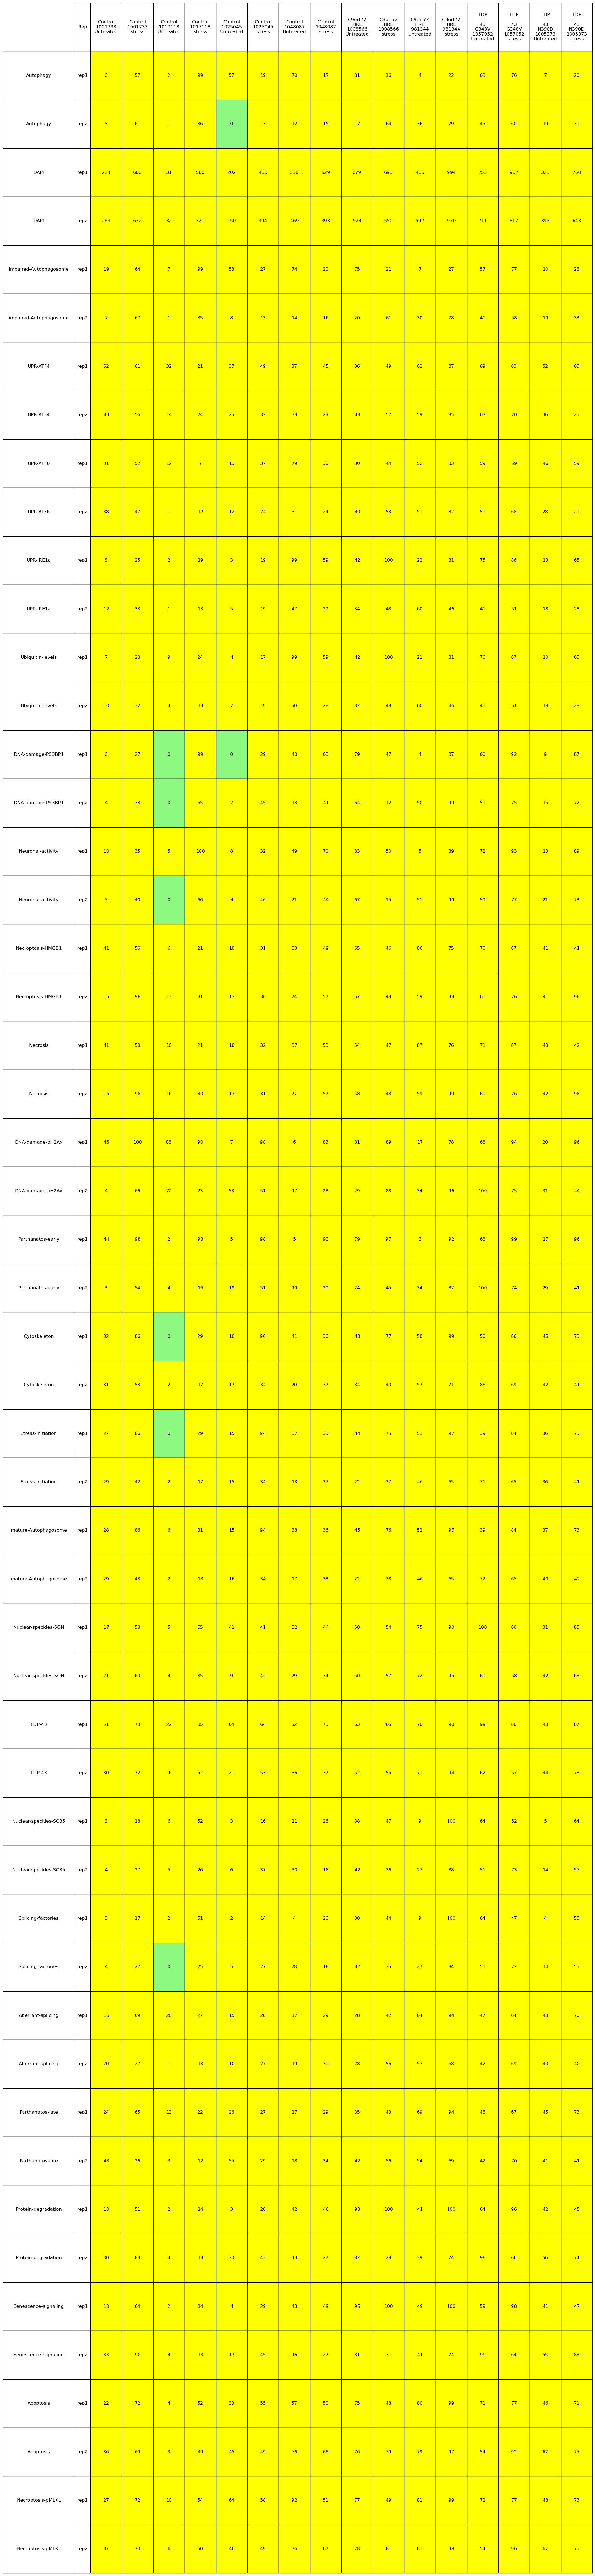

In [16]:
display_diff(batches, raws, procs, PLOT_PATH, fig_width=8, fig_height = 40)

### Variance in each batch (of processed files)

In [17]:
for batch in batches:
    with contextlib.redirect_stdout(io.StringIO()):
        var = sample_and_calc_variance(root_directory_proc, batch, 
                                       sample_size_per_markers=200, cond_count=1, rep_count=len(reps), 
                                       num_markers=len(markers))
    print(f'{batch} var: ',var)

/home/projects/hornsteinlab/Collaboration/NOVA_GAL/NOVA/tools/preprocessing_tools/qc_reports/qc_utils.py:29: RuntimeWarning: Mean of empty slice.
  tiles_var = np.var(x, axis=(1,2)).mean()
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/projects/hornsteinlab/Collaboration/NOVA_GAL/NOVA/tools/preprocessing_tools/qc_reports/qc_utils.py:29: RuntimeWarning: Mean of empty slice.
  tiles_var = np.var(x, axis=(1,2)).mean()
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/projects/hornsteinlab/Collaboration/NOVA_GAL/NOVA/tools/preprocessing_tools/qc_reports/qc_utils.py:29: RuntimeWarning: Mean of empty slice.
  tiles_var = np.var(x, axis=(1,2)).mean()
/home/projects/hornstei

/home/projects/hornsteinlab/Collaboration/NOVA_GAL/NOVA/tools/preprocessing_tools/qc_reports/qc_utils.py:29: RuntimeWarning: Mean of empty slice.
  tiles_var = np.var(x, axis=(1,2)).mean()
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/projects/hornsteinlab/Collaboration/NOVA_GAL/NOVA/tools/preprocessing_tools/qc_reports/qc_utils.py:29: RuntimeWarning: Mean of empty slice.
  tiles_var = np.var(x, axis=(1,2)).mean()
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/projects/hornsteinlab/Collaboration/NOVA_GAL/NOVA/tools/preprocessing_tools/qc_reports/qc_utils.py:29: RuntimeWarning: Mean of empty slice.
  tiles_var = np.var(x, axis=(1,2)).mean()
/home/projects/hornstei

/home/projects/hornsteinlab/Collaboration/NOVA_GAL/NOVA/tools/preprocessing_tools/qc_reports/qc_utils.py:29: RuntimeWarning: Mean of empty slice.
  tiles_var = np.var(x, axis=(1,2)).mean()
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/projects/hornsteinlab/Collaboration/NOVA_GAL/NOVA/tools/preprocessing_tools/qc_reports/qc_utils.py:29: RuntimeWarning: Mean of empty slice.
  tiles_var = np.var(x, axis=(1,2)).mean()
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/projects/hornsteinlab/Collaboration/NOVA_GAL/NOVA/tools/preprocessing_tools/qc_reports/qc_utils.py:29: RuntimeWarning: Mean of empty slice.
  tiles_var = np.var(x, axis=(1,2)).mean()
/home/projects/hornstei

/home/projects/hornsteinlab/Collaboration/NOVA_GAL/NOVA/tools/preprocessing_tools/qc_reports/qc_utils.py:29: RuntimeWarning: Mean of empty slice.
  tiles_var = np.var(x, axis=(1,2)).mean()
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/projects/hornsteinlab/Collaboration/NOVA_GAL/NOVA/tools/preprocessing_tools/qc_reports/qc_utils.py:29: RuntimeWarning: Mean of empty slice.
  tiles_var = np.var(x, axis=(1,2)).mean()
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/projects/hornsteinlab/Collaboration/NOVA_GAL/NOVA/tools/preprocessing_tools/qc_reports/qc_utils.py:29: RuntimeWarning: Mean of empty slice.
  tiles_var = np.var(x, axis=(1,2)).mean()
/home/projects/hornstei

Batch1 var:  nan


/home/projects/hornsteinlab/Collaboration/NOVA_GAL/NOVA/tools/preprocessing_tools/qc_reports/qc_utils.py:29: RuntimeWarning: Mean of empty slice.
  tiles_var = np.var(x, axis=(1,2)).mean()
/home/projects/hornsteinlab/Collaboration/NOVA_GAL/NOVA/tools/preprocessing_tools/qc_reports/qc_utils.py:29: RuntimeWarning: Mean of empty slice.
  tiles_var = np.var(x, axis=(1,2)).mean()
/home/projects/hornsteinlab/Collaboration/NOVA_GAL/NOVA/tools/preprocessing_tools/qc_reports/qc_utils.py:29: RuntimeWarning: Mean of empty slice.
  tiles_var = np.var(x, axis=(1,2)).mean()
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/projects/hornsteinlab/Collaboration/NOVA_GAL/NOVA/tools/preprocessing_tools/qc_reports/qc_utils.py:29: RuntimeWarning: Mean of empty slice.
  tiles_var = np.var(x, axis=(1,2)).mean()
/home/projects/hornsteinlab/galavir/.co

/home/projects/hornsteinlab/Collaboration/NOVA_GAL/NOVA/tools/preprocessing_tools/qc_reports/qc_utils.py:29: RuntimeWarning: Mean of empty slice.
  tiles_var = np.var(x, axis=(1,2)).mean()
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/projects/hornsteinlab/Collaboration/NOVA_GAL/NOVA/tools/preprocessing_tools/qc_reports/qc_utils.py:29: RuntimeWarning: Mean of empty slice.
  tiles_var = np.var(x, axis=(1,2)).mean()
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/projects/hornsteinlab/Collaboration/NOVA_GAL/NOVA/tools/preprocessing_tools/qc_reports/qc_utils.py:29: RuntimeWarning: Mean of empty slice.
  tiles_var = np.var(x, axis=(1,2)).mean()
/home/projects/hornstei

/home/projects/hornsteinlab/Collaboration/NOVA_GAL/NOVA/tools/preprocessing_tools/qc_reports/qc_utils.py:29: RuntimeWarning: Mean of empty slice.
  tiles_var = np.var(x, axis=(1,2)).mean()
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/projects/hornsteinlab/Collaboration/NOVA_GAL/NOVA/tools/preprocessing_tools/qc_reports/qc_utils.py:29: RuntimeWarning: Mean of empty slice.
  tiles_var = np.var(x, axis=(1,2)).mean()
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/projects/hornsteinlab/Collaboration/NOVA_GAL/NOVA/tools/preprocessing_tools/qc_reports/qc_utils.py:29: RuntimeWarning: Mean of empty slice.
  tiles_var = np.var(x, axis=(1,2)).mean()
/home/projects/hornstei

/home/projects/hornsteinlab/Collaboration/NOVA_GAL/NOVA/tools/preprocessing_tools/qc_reports/qc_utils.py:29: RuntimeWarning: Mean of empty slice.
  tiles_var = np.var(x, axis=(1,2)).mean()
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/projects/hornsteinlab/Collaboration/NOVA_GAL/NOVA/tools/preprocessing_tools/qc_reports/qc_utils.py:29: RuntimeWarning: Mean of empty slice.
  tiles_var = np.var(x, axis=(1,2)).mean()
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/projects/hornsteinlab/Collaboration/NOVA_GAL/NOVA/tools/preprocessing_tools/qc_reports/qc_utils.py:29: RuntimeWarning: Mean of empty slice.
  tiles_var = np.var(x, axis=(1,2)).mean()
/home/projects/hornstei

Batch2 var:  nan


## Preprocessing Filtering qc
By order of filtering

### 1. % site survival after Brenner on DAPI channel
Percentage out of the total sites

In [18]:
dapi_filter_by_brenner = show_site_survival_dapi_brenner(df_dapi,batches, line_colors, panels,
                                                        figsize=(6,18), reps=reps, vmax=100)


KeyboardInterrupt



In [ ]:
show_images(df_metadata, marker='DAPI', show_DAPI=False, batch=2, panel='L', cell_line='C9orf72-HRE-1008566', rep=1,
            condition='stress', funova=True, samples=5)

In [ ]:
show_images(df_metadata, marker='DAPI', show_DAPI=False, batch=2, panel='D', cell_line='Control-1017118', rep=1,
            condition='stress', funova=True, samples=5)

In [ ]:
# temp1 = get_specific_imgs(dfb, marker='DAPI', batch=2,cell_line='Control_1017118', rep=1, condition='stress')
# temp = temp1.loc[temp1.Panel =='D'].Target_Sharpness_Brenner
# temp1 = temp1.Target_Sharpness_Brenner
# plt.hist(temp1)
# plt.hist(temp)

### 2. % Site survival after Cellpose
Percentage out of the sites that passed the previous filter. In parenthesis are absolute values.

**A site will be filtered out if Cellpose found 0 cells in it.**

In [ ]:
dapi_filter_by_cellpose = show_site_survival_dapi_cellpose(df_dapi, batches, dapi_filter_by_brenner, 
                                                           line_colors, panels, figsize=(6,18), reps=reps)

### 3. % Site survival by tiling
Percentage out of the sites that passed the previous filter. In parenthesis are absolute values.

**A site will be filtered out if after tiling, no tile is containing at least 85% of a cell that Cellpose detected.**

In [ ]:
dapi_filter_by_tiling=show_site_survival_dapi_tiling(df_dapi, batches, dapi_filter_by_cellpose, 
                                                     line_colors, panels, figsize=(6,18), reps=reps)

### 4. % Site survival after Brenner on DAPI's tiles
Percentage out of the sites that passed the previous filter. In parenthesis are absolute values (if different than the percentages).

In [ ]:
dapi_filter_by_brenner_tiles=show_site_survival_by_brenner_on_dapi_tiles(df_dapi, batches, dapi_filter_by_tiling, 
                                                     line_colors, panels, figsize=(6,18), reps=reps)

### 5. % Site survival after Brenner on target channel
Percentage out of the sites that passed the previous filter. In parenthesis are absolute values (if different than the percentages).

In [ ]:
show_site_survival_target_brenner(df_dapi, df_target, dapi_filter_by_brenner_tiles,
                                 figsize=(6,24), markers=markers)

In [ ]:
df_dapi.iloc[np.where(df_dapi['n_valid_tiles']-df_dapi['n_valid_tiles_after_tiles_brenner'])][['n_valid_tiles','n_valid_tiles_after_tiles_brenner']]

In [ ]:
## Images that were completely removed and their corresponding DAPI 
show_images(df_metadata, marker = 'Senescence-signaling', show_DAPI = True, 
            batch = 1, cell_line ='Control-1048087', 
            condition = 'stress', rep=2, funova = True, samples = 5)

In [ ]:
show_images(df_metadata, marker='Parthanatos-early', show_DAPI=False, batch=2, panel='H', cell_line='TDP--43-G348V-1057052', 
            rep=2, condition='Untreated', funova=True, samples=5)

In [ ]:
show_images(df_metadata, marker='Protein-degradation', show_DAPI=False, batch=2, panel='L', cell_line='C9orf72-HRE-981344', rep=1,
            condition='stress', funova=True, samples=5)

Find non valid wells

In [ ]:
dfb = pd.read_csv("/home/labs/hornsteinlab/Collaboration/FUNOVA/outputs/preprocessing/brenner/raw_metrics280125_exp3.csv")
# Extract the panel (e.g., "panelD") from the Path column
dfb['Panel'] = dfb['Path'].str.extract(r'/panel([A-Z])/', expand=True)
dfb['image_id'] = dfb['Path'].apply(lambda path: path.split('/')[-1].split('.')[0])
find_bad_wells(dfb, threshold=50000, percentage_filter=70)

In [ ]:
# thresholds = {
#     "Stress_initiation": (0, 99),
#     "Aberrant_splicing": (1, 97),
#     "Autophagy": (5, 97),
#     "DAPI": (0.2, 95),
#     "Apoptosis": (0.27, 95),
#     "impaired_Autophagosome": (5, 99),
#     "Cytoskeleton": (10, 99.8),
#     "DNA_damage_P53BP1": (0.3, 90),
#     "DNA_damage_pH2Ax": (7, 85),
#     "mature_Autophagosome": (2, 98),
#     "Necrosis": (4, 95),
#     "Neuronal_activity": (5, 90),
#     "Nuclear_speckles_SC35": (0.2, 85),
#     "Nuclear_speckles_SON": (0.2, 85),
#     "Parthanatos_early": (0, 85),
#     "Parthanatos_late": (5, 95),
#     "Protein_degradation": (5, 92),
#     "Senescence_signaling": (10, 90),
#     "Splicing_factories": (0, 95),
#     "TDP-43": (5, 99.2),
#     "Ubiquitin_levels": (2, 90),
#     "UPR_ATF4": (2, 99.7), 
#     "UPR_ATF6": (3, 100),
#     "UPR_IRE1a": (2, 98),
#     "Necroptosis_pMLKL": (5, 90),
#     "Necroptosis_HMGB1": (0.01, 90),
# }
# # Extended batch data with new entries
# data = [
#     (2, 'DNA_damage_pH2Ax', 1, 1017118, 'Untreated'),
#     (2, 'Parthanatos_early', 1, 1048087, 'stress'),
#     (2, 'DNA_damage_pH2Ax', 2, 1008566, 'stress'),
#     (2, 'Parthanatos_early', 1, 981344, 'stress'),
#     (2, 'Nuclear_speckles_SON', 1, 981344, 'stress'),
#     (1, 'Autophagy', 1, 1057052, 'stress'),
#     (1, 'impaired_Autophagosome', 1, 1057052, 'stress'),
#     (1, 'UPR_IRE1a', 1, 1057052, 'stress'),
#     (1, 'Ubiquitin_levels', 1, 1057052, 'stress'),
#     (1, 'UPR_IRE1a', 1, 981344, 'stress'),
#     (1, 'Ubiquitin_levels', 1, 981344, 'stress'),
#     (1, 'DNA_damage_P53BP1', 1, 981344, 'stress'),
#     (1, 'Neuronal_activity', 1, 981344, 'stress'),
#     (1, 'Necroptosis_HMGB1', 1, 981344, 'stress'),
#     (1, 'Necrosis', 1, 981344, 'stress'),
#     (1, 'Nuclear_speckles_SC35', 2, 981344, 'stress'),
#     (1, 'Splicing_factories', 2, 981344, 'stress'),
#     (1, 'Aberrant_splicing', 2, 981344, 'stress'),
#     (1, 'Parthanatos_late', 2, 981344, 'stress'),
#     (1, 'Senescence_signaling', 2, 1048087, 'stress'),
#     (1, 'Apoptosis', 2, 981344, 'stress'),
#     (1, 'Necroptosis_pMLKL', 2, 981344, 'stress'),
#     (2, 'Autophagy', 1, 1017118, 'stress'),
#     (2, 'impaired_Autophagosome', 1, 1017118, 'stress'),
#     (2, 'UPR_IRE1a', 1, 1048087, 'Untreated'),
#     (2, 'UPR_IRE1a', 1, 1008566, 'stress'),
#     (2, 'Ubiquitin_levels', 1, 1048087, 'Untreated'),
#     (2, 'Ubiquitin_levels', 1, 1008566, 'stress'),
#     (2, 'DNA_damage_P53BP1', 1, 1017118, 'stress'),
#     (2, 'Neuronal_activity', 1, 1017118, 'stress'),
#     (2, 'DNA_damage_P53BP1', 2, 981344, 'stress'),
#     (2, 'Neuronal_activity', 2, 981344, 'stress'),
#     (2, 'DNA_damage_P53BP1', 1, 981344, 'stress'),
#     (2, 'Neuronal_activity', 1, 981344, 'stress'),
#     (2, 'DNA_damage_P53BP1', 1, 1057052, 'stress'),
#     (2, 'Neuronal_activity', 1, 1057052, 'stress'),
#     (2, 'DNA_damage_P53BP1', 1, 1005373, 'stress'),
#     (2, 'Neuronal_activity', 1, 1005373, 'stress'),
#     (2, 'DNA_damage_P53BP1', 2, 1057052, 'stress'),
#     (2, 'Neuronal_activity', 2, 1057052, 'stress'),
#     (2, 'Necroptosis_HMGB1', 1, 981344, 'Untreated'),
#     (2, 'Necrosis', 1, 981344, 'Untreated'),
#     (2, 'Necroptosis_HMGB1', 2, 981344, 'stress'),
#     (2, 'Necrosis', 2, 981344, 'stress'),
#     (2, 'Necroptosis_HMGB1', 2, 1001733, 'stress'),
#     (2, 'Necrosis', 2, 1001733, 'stress'),
#     (2, 'Necroptosis_HMGB1', 2, 1005373, 'stress'),
#     (2, 'Necrosis', 2, 1005373, 'stress')
# ]

# # Cell line ID mapping
# cell_line_mapping = {
#     1008566: 'C9orf72-HRE_1008566',
#     981344: 'C9orf72-HRE_981344',
#     1001733: 'Control_1001733',
#     1017118: 'Control_1017118',
#     1025045: 'Control_1025045',
#     1048087: 'Control_1048087',
#     1057052: 'TDP--43-G348V_1057052',
#     1005373: 'TDP--43-N390D_1005373'
# }

# # Convert to DataFrame (renamed to `marker_df`)
# marker_df = pd.DataFrame(data, columns=['Batch', 'Name', 'Rep', 'CellLineID', 'Condition'])

# lower_thresh_DAPI, upper_thresh_DAPI = thresholds['DAPI']
# cb = get_specific_imgs(dfb, marker='DAPI')
# cb = cb.loc[(cb.Batch == 'Batch1') | (cb.Batch == 'Batch2')].Target_Sharpness_Brenner.values
# lower_p_DAPI = np.percentile(cb, lower_thresh_DAPI)
# upper_p_DAPI = np.percentile(cb, upper_thresh_DAPI)

# # Iterate over each row
# for _, row in marker_df.iterrows():
#     batch, marker, rep, cell_line_id, condition = row

#     # Match Cell Line Name
#     cell_line = cell_line_mapping.get(cell_line_id, f'Unknown_{cell_line_id}')

#     # Fetch images based on specific conditions
#     cb1 = get_specific_imgs(dfb, marker=marker, batch=batch, rep=rep, 
#                            cell_line=cell_line, condition=condition)
    
#     dapi_paths = cb1.Path.apply(lambda p: get_dapi_path(p, marker1=marker, marker2='DAPI', funova=True))
#     dfDAPI = dfb.loc[dfb['Path'].isin(dapi_paths)].Target_Sharpness_Brenner.values
#     cb1 = cb1.Target_Sharpness_Brenner.values

#     # Print statistics dynamically for the specific selection
#     print(f"Stats for marker: {marker}, batch: {batch}, rep: {rep}, cell_line: {cell_line}, condition: {condition}")
#     print(f"Mean: {np.mean(cb1):.2f}, Median: {np.median(cb1):.2f}, "
#           f"10th Percentile: {np.percentile(cb1, 10):.2f}, "
#           f"50th Percentile (Median): {np.percentile(cb1, 50):.2f}, "
#           f"90th Percentile: {np.percentile(cb1, 90):.2f}")

#     # Fetch images for the entire dataset with the given marker
#     cb = get_specific_imgs(dfb, marker=marker)
#     cb = cb.loc[(cb.Batch == 'Batch1') | (cb.Batch == 'Batch2')].Target_Sharpness_Brenner.values
    
#     lower_thresh, upper_thresh = thresholds[marker]
#     lower_p = np.percentile(cb, lower_thresh)
#     upper_p = np.percentile(cb, upper_thresh)
    
#     filtered_out = np.sum((cb1 < lower_p) | (cb1 > upper_p))
#     total_count = len(cb1)
#     filtered_percentage = (filtered_out / total_count) * 100 if total_count > 0 else 0
    
#     filtered_out_DAPI = np.sum((dfDAPI < lower_p_DAPI) | (dfDAPI > upper_p_DAPI))
#     total_count_DAPI = len(dfDAPI)
#     filtered_percentage_DAPI = (filtered_out_DAPI / total_count_DAPI) * 100 if total_count_DAPI > 0 else 0

#     # Print statistics dynamically for the full dataset
#     print(f"Stats for marker: {marker} (All batches, reps, and cell lines)")
#     print(f"Mean: {np.mean(cb):.2f}, Median: {np.median(cb):.2f}, "
#           f"10th Percentile: {np.percentile(cb, 10):.2f}, "
#           f"50th Percentile (Median): {np.percentile(cb, 50):.2f}, "
#           f"90th Percentile: {np.percentile(cb, 90):.2f}")
    
#     print(f"Threshold Percentiles ({lower_thresh}% - {upper_thresh}%): {lower_p:.2f} - {upper_p:.2f}")
#     print(f"Filtered Out: {filtered_out}/{total_count} ({filtered_percentage:.2f}%)")
#     print(f"Filtered Out_DAPI: {filtered_out_DAPI}/{total_count_DAPI} ({filtered_percentage_DAPI:.2f}%)")

#     print("-" * 80)  # Separator for readability

In [ ]:
show_images(df_metadata, marker='DNA-damage-pH2Ax', show_DAPI=True, batch=2, cell_line='C9orf72-HRE-1008566', rep=2,
            condition='stress', funova=True, samples=5)

### 6. % Site survival after Brenner on target channel tiles
Percentage out of the tiles that passed the previous filter. In parenthesis are absolute values (if different than the percentages).

In [ ]:
show_site_survival_target_brenner_tiles(df_dapi, df_target, dapi_filter_by_brenner_tiles,
                                 figsize=(6,24), markers=markers)

## Statistics About the Processed Files

In [24]:
names = ['Total number of tiles', 'Total number of whole cells']
stats = ['n_valid_tiles_after_tiles_brenner','site_whole_cells_counts_sum','site_cell_count','site_cell_count_sum']
total_sum = calc_total_sums(df_target, df_dapi, stats, markers)

In [ ]:
total_sum.rename(columns={'n_valid_tiles_after_tiles_brenner': 'n_valid_tiles'}, inplace=True)

In [ ]:
plot_marker_data(total_sum, split_by_cell_line=True)

In [ ]:
plot_marker_data(total_sum, split_by_cell_line=False)

### Total tiles

In [ ]:
total_sum.n_valid_tiles.sum()

### Total whole nuclei in tiles

In [ ]:
total_sum[total_sum.marker =='DAPI'].site_whole_cells_counts_sum.sum()

### Total nuclei in sites

In [ ]:
total_sum[total_sum.marker =='DAPI'].site_cell_count.sum()

In [ ]:
show_total_sum_tables(total_sum)

### Show Total Tile Counts
For each batch, cell line, replicate and markerTotal number of tiles

In [ ]:
to_heatmap = total_sum.rename(columns={'n_valid_tiles':'index'})
plot_filtering_heatmap(to_heatmap, extra_index='marker', vmin=None, vmax=None,
                      xlabel = 'Total number of tiles', show_sum=True, figsize=(6,24))

### Show Total Whole Cell Counts
For each batch, cell line, replicate and markerTotal number of tiles

In [ ]:
to_heatmap = total_sum.rename(columns={'site_whole_cells_counts_sum':'index'})
plot_filtering_heatmap(to_heatmap, extra_index='marker', vmin=None, vmax=None,
                      xlabel = 'Total number of whole cells', show_sum=True, figsize=(6,24))

### Show **Cell Count** Statistics per Batch

In [ ]:
df_no_empty_sites = df_dapi[df_dapi.n_valid_tiles_after_tiles_brenner !=0]
plot_cell_count(df_no_empty_sites, lines_order, custom_palette, y='site_cell_count_sum', 
                title='Cell Count Average per Site (from tiles)', figsize=(16,6))

plot_cell_count(df_no_empty_sites, lines_order, custom_palette, y='site_whole_cells_counts_sum',
                title='Whole Cell Count Average per Site',figsize=(16,6))

plot_cell_count(df_no_empty_sites, lines_order, custom_palette, y='site_cell_count',
               title='Cellpose Cell Count Average per Site',figsize=(16,6))


### Show **Tiles** per Site Statistics


In [ ]:
df_dapi.groupby(['cell_line_cond']).n_valid_tiles_after_tiles_brenner.mean()

In [ ]:
plot_catplot(df_dapi, sns.color_palette('colorblind'), reps=reps,x='cell_line', y_title='Valid Tiles Count', x_title='Cell Line', y='n_valid_tiles_after_tiles_brenner', hue='rep',
             height=4, aspect=2)


### Show Mean of cell count in valid tiles

In [ ]:
# plot_hm(df_dapi, split_by='rep', rows='cell_line', columns='panel', vmax=3)

# Assessing Staining Reproducibility and Outliers

In [ ]:
# for batch in batches:
#     print(batch)
#     run_calc_hist_new(batch,cell_lines_for_disp, markers, root_directory_raw, root_directory_proc,
#                            hist_sample=10,sample_size_per_markers=10, ncols=4, nrows=1, figsize=(6,2))
#     print("="*30)
    

In [ ]:
# save notebook as HTML ( the HTML will be saved in the same folder the original script is)
display(Javascript('IPython.notebook.save_checkpoint();'))
os.system(f'jupyter nbconvert --to html tools/preprocessing_tools/qc_reports/qc_report_funova_exp3.ipynb --output {NOVA_HOME}/manuscript/preprocessing_qc_reports/qc_report_funova_exp3_11.03.25.html')